In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)

df = pd.read_csv("/content/nba_player_data_1996-2024.csv")

In [ ]:
df.columns

Index(['normalized_name', 'age', 'player_height', 'player_weight', 'college',
       'country', 'draft_year', 'draft_round', 'draft_number', 'pts', 'reb',
       'ast', 'season', 'Pos.x', 'MP.x', 'G.x', 'eFG.', 'X3P', 'X3PA', 'X3P.',
       'X3PAr', 'X2P', 'X2PA', 'X2P.', 'FT', 'FTA', 'FT.', 'PER', 'TS.',
       'TRB.', 'AST.', 'TOV.', 'USG.', 'WS', 'VORP', 'BPM'],
      dtype='object')

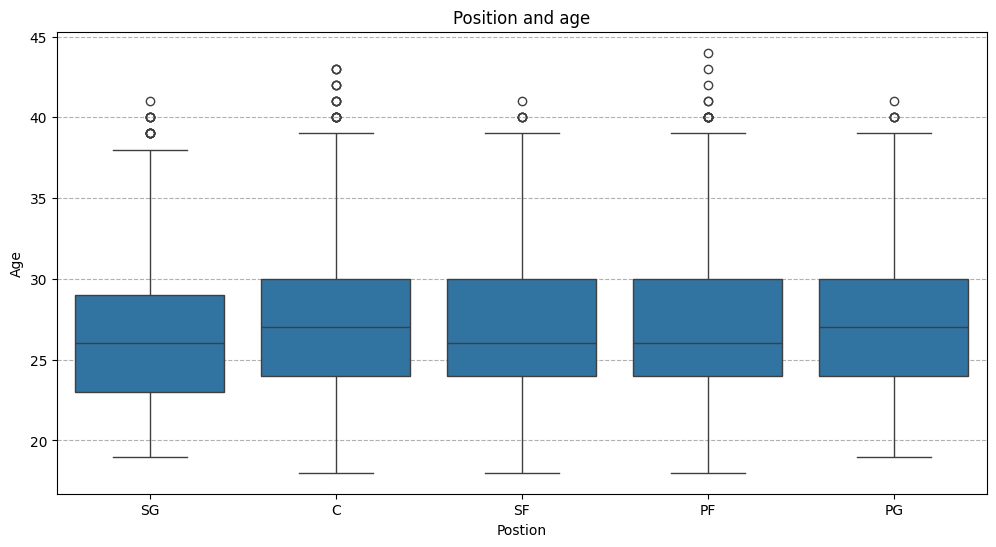

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_analysis = df[['age', 'Pos.x']].copy()
df_analysis = df_analysis.dropna()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Pos.x', y='age', data=df_analysis)
plt.title('Position and age')
plt.xlabel('Postion')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
columns_to_drop = ['normalized_name', 'age', 'college', 'country', 'draft_year', 'draft_round', 'draft_number', 'season']
df = df.drop(columns=columns_to_drop)

In [ ]:
df.head()

,player_height,player_weight,pts,reb,ast,Pos.x,MP.x,G.x,eFG.,X3P,X3PA,X3P.,X3PAr,X2P,X2PA,X2P.,FT,FTA,FT.,PER,TS.,TRB.,AST.,TOV.,USG.,WS,VORP,BPM
0,183.58,74.61,31.1,3.8,4.6,SG,42.0,71,0.447,1.4,4.3,0.320,0.169,9.4,21.2,0.441,8.2,10.1,0.814,24.0,0.518,5.2,23.0,10.0,35.9,11.8,6.1,6.1
1,198.15,99.23,29.8,3.9,5.1,SG,40.2,80,0.445,2.1,5.9,0.351,0.245,7.6,18.2,0.418,8.3,10.1,0.822,21.8,0.521,5.2,25.8,12.5,35.2,9.2,5.8,5.1
2,216.31,142.56,28.7,12.7,3.7,C,39.5,74,0.572,0.0,0.0,0.000,0.001,11.0,19.2,0.573,6.7,13.1,0.513,30.2,0.574,18.1,18.8,10.5,31.6,14.9,7.1,7.7
3,201.60,95.20,28.5,5.9,5.0,SG,40.9,68,0.484,0.9,2.9,0.305,0.132,9.4,19.3,0.489,7.0,8.2,0.853,24.5,0.552,8.1,23.0,11.1,31.8,11.3,4.7,4.8
4,198.64,102.34,27.6,5.5,3.9,SF,39.7,75,0.509,2.2,5.3,0.408,0.240,8.0,16.8,0.477,5.1,6.7,0.765,25.0,0.551,7.9,19.2,8.2,30.7,12.9,7.2,7.6


In [ ]:
df.columns

Index(['player_height', 'player_weight', 'pts', 'reb', 'ast', 'Pos.x', 'MP.x',
       'G.x', 'eFG.', 'X3P', 'X3PA', 'X3P.', 'X3PAr', 'X2P', 'X2PA', 'X2P.',
       'FT', 'FTA', 'FT.', 'PER', 'TS.', 'TRB.', 'AST.', 'TOV.', 'USG.', 'WS',
       'VORP', 'BPM'],
      dtype='object')

In [ ]:
print(df.isnull().sum())

player_height    0
player_weight    0
pts              0
reb              0
ast              0
Pos.x            0
MP.x             0
G.x              0
eFG.             0
X3P              0
X3PA             0
X3P.             0
X3PAr            0
X2P              0
X2PA             0
X2P.             0
FT               0
FTA              0
FT.              0
PER              0
TS.              0
TRB.             0
AST.             0
TOV.             0
USG.             0
WS               0
VORP             0
BPM              0
dtype: int64


In [ ]:
def find_outliers_iqr_all(df):
    numeric_cols = df.select_dtypes(include='number').columns
    outlier_indices = set()

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)].index
        outlier_indices.update(outliers)

    # 리스트로 변환해서 인덱싱
    return df.loc[list(outlier_indices)]

# 실행
df_outliers = find_outliers_iqr_all(df)
print(f"이상치가 포함된 행 수: {len(df_outliers)}")
display(df_outliers)

이상치가 포함된 행 수: 4371


,player_height,player_weight,pts,reb,ast,Pos.x,MP.x,G.x,eFG.,X3P,X3PA,X3P.,X3PAr,X2P,X2PA,X2P.,FT,FTA,FT.,PER,TS.,TRB.,AST.,TOV.,USG.,WS,VORP,BPM
0,183.58,74.61,31.1,3.8,4.6,SG,42.0,71,0.447,1.4,4.3,0.320,0.169,9.4,21.2,0.441,8.2,10.1,0.814,24.0,0.518,5.2,23.0,10.0,35.9,11.8,6.1,6.1
1,198.15,99.23,29.8,3.9,5.1,SG,40.2,80,0.445,2.1,5.9,0.351,0.245,7.6,18.2,0.418,8.3,10.1,0.822,21.8,0.521,5.2,25.8,12.5,35.2,9.2,5.8,5.1
2,216.31,142.56,28.7,12.7,3.7,C,39.5,74,0.572,0.0,0.0,0.000,0.001,11.0,19.2,0.573,6.7,13.1,0.513,30.2,0.574,18.1,18.8,10.5,31.6,14.9,7.1,7.7
3,201.60,95.20,28.5,5.9,5.0,SG,40.9,68,0.484,0.9,2.9,0.305,0.132,9.4,19.3,0.489,7.0,8.2,0.853,24.5,0.552,8.1,23.0,11.1,31.8,11.3,4.7,4.8
4,198.64,102.34,27.6,5.5,3.9,SF,39.7,75,0.509,2.2,5.3,0.408,0.240,8.0,16.8,0.477,5.1,6.7,0.765,25.0,0.551,7.9,19.2,8.2,30.7,12.9,7.2,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8166,209.10,107.51,4.2,1.8,0.0,PF,8.6,5,0.800,0.4,0.6,0.667,0.300,1.0,1.4,0.714,1.0,1.2,0.833,18.8,0.831,11.5,0.0,13.7,15.0,0.2,0.0,2.4
8180,209.20,111.03,4.0,4.0,1.0,C,22.0,1,0.400,0.0,0.0,0.000,0.000,2.0,5.0,0.400,0.0,0.0,0.000,-3.2,0.400,10.2,6.4,37.5,16.1,-0.1,-0.1,-14.7
8187,196.14,83.51,3.8,1.0,0.6,SG,9.0,5,0.425,0.6,2.8,0.214,0.700,0.8,1.2,0.667,0.4,0.4,1.000,8.5,0.455,6.3,10.3,8.7,22.5,0.0,0.0,-3.3
8188,211.50,113.65,3.7,1.9,0.2,C,6.7,32,0.731,0.0,0.0,0.000,0.000,1.5,2.1,0.731,0.7,0.9,0.724,24.2,0.746,15.7,3.8,12.1,18.8,1.0,0.2,1.0


In [ ]:
import numpy as np

def detect_and_remove_heavy_mad_outliers(df, threshold=3.5, min_outlier_count=5):
    numeric_cols = df.select_dtypes(include='number').columns
    outlier_flags = pd.DataFrame(False, index=df.index, columns=numeric_cols)

    for col in numeric_cols:
        median = df[col].median()
        abs_deviation = np.abs(df[col] - median)
        mad = abs_deviation.median()

        if mad == 0:
            continue

        modified_z = 0.6745 * abs_deviation / mad
        outlier_flags[col] = modified_z > threshold

    # 이상치 컬럼명 및 개수 계산
    outlier_cols_list = outlier_flags.apply(lambda row: [col for col in numeric_cols if row[col]], axis=1)
    outlier_count = outlier_flags.sum(axis=1)

    # 이상치 요약 데이터프레임 생성
    outlier_summary = df.copy()
    outlier_summary["outlier_columns"] = outlier_cols_list
    outlier_summary["outlier_count"] = outlier_count

    # 이상치가 min_outlier_count 이상인 행만 필터링
    heavy_outliers = outlier_summary[outlier_summary["outlier_count"] >= min_outlier_count]
    print(f"이상치 컬럼이 {min_outlier_count}개 이상인 행 수: {len(heavy_outliers)}")

    # 해당 이상치 행을 제거한 새로운 DataFrame 반환
    df_cleaned = df.drop(index=heavy_outliers.index)
    print(f"제거 후 남은 데이터 행 수: {len(df_cleaned)}")

    return df_cleaned, heavy_outliers

# 실행
df_cleaned, df_outliers_5plus = detect_and_remove_heavy_mad_outliers(df, threshold=3.5, min_outlier_count=5)

# 이상치 목록 확인
display(df_outliers_5plus[["outlier_columns", "outlier_count"]])

이상치 컬럼이 5개 이상인 행 수: 676
제거 후 남은 데이터 행 수: 12715


,outlier_columns,outlier_count
0,"[pts, X2P, X2PA, FT, FTA, USG., WS, VORP]",8
1,"[pts, X2PA, FT, FTA, VORP]",5
2,"[pts, reb, X2P, X2PA, FT, FTA, PER, WS, VORP]",9
3,"[pts, X2P, X2PA, FT, FTA, WS, VORP]",7
4,"[pts, X2P, X2PA, FT, FTA, WS, VORP]",7
...,...,...
13386,"[eFG., X2P., FT., PER, TS., TOV., BPM]",7
13387,"[eFG., X2P., FT., PER, TS., AST., BPM]",7
13388,"[eFG., X2P., FT., PER, TS., BPM]",6
13389,"[eFG., X2P., FT., TS., USG.]",5


In [ ]:
X = df.drop(columns=['Pos.x'])

In [ ]:
y = df['Pos.x']

In [ ]:
X.columns

Index(['player_height', 'player_weight', 'pts', 'reb', 'ast', 'MP.x', 'G.x',
       'eFG.', 'X3P', 'X3PA', 'X3P.', 'X3PAr', 'X2P', 'X2PA', 'X2P.', 'FT',
       'FTA', 'FT.', 'PER', 'TS.', 'TRB.', 'AST.', 'TOV.', 'USG.', 'WS',
       'VORP', 'BPM'],
      dtype='object')

In [ ]:
# 1. 신체 비율
X['bmi'] = X['player_weight'] / ((X['player_height'] / 100) ** 2)

# 2. 출전 시간 대비 성과 (0 나눔 방지)
X['pts_per_min'] = X['pts'] / (X['MP.x'] + 1e-5)
X['reb_per_min'] = X['reb'] / (X['MP.x'] + 1e-5)
X['ast_per_min'] = X['ast'] / (X['MP.x'] + 1e-5)

# 3. 슈팅 집중도
X['fg_share'] = X['X3PA'] + X['X2PA']
X['3p_ratio'] = X['X3PA'] / (X['fg_share'] + 1e-5)

# 4. 공격 효율/기여도 복합 지표
X['offensive_index'] = X['TS.'] * X['USG.'] * X['AST.']
X['defensive_proxy'] = X['TRB.'] - X['TOV.']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# 정규화할 컬럼만 따로 지정
cols_to_scale = [col for col in X.columns if col not in ['X3PAr', 'TS.', 'FT.', 'X3P.', 'FT.', '3p_ratio']]

# 나눠서 처리
X_train_to_scale = X_train[cols_to_scale]
X_test_to_scale = X_test[cols_to_scale]

scaler = StandardScaler()
X_train_scaled_part = scaler.fit_transform(X_train_to_scale)
X_test_scaled_part = scaler.transform(X_test_to_scale)

# 비율 컬럼은 그대로 유지해서 다시 합치기
X_train_scaled = pd.DataFrame(X_train_scaled_part, columns=cols_to_scale, index=X_train.index)
X_train_scaled[X_train.columns.difference(cols_to_scale)] = X_train[X_train.columns.difference(cols_to_scale)]

X_test_scaled = pd.DataFrame(X_test_scaled_part, columns=cols_to_scale, index=X_test.index)
X_test_scaled[X_test.columns.difference(cols_to_scale)] = X_test[X_test.columns.difference(cols_to_scale)]

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))

0.7529873039581777
0.7420679357969392


In [ ]:
cs = [0.01, 0.1, 1.0, 10.0, 50.0, 100.0]

train_scores = []
test_scores = []

for c in cs:
  model = LogisticRegression(C=c, solver='lbfgs', max_iter=1000, random_state=42)
  model.fit(X_train_scaled, y_train)
  train_scores.append(model.score(X_train_scaled, y_train))
  test_scores.append(model.score(X_test_scaled, y_test))

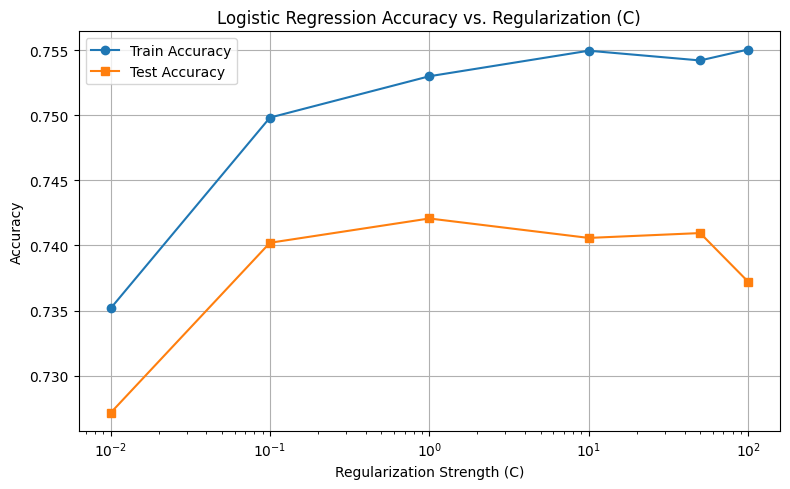

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(cs, train_scores, marker='o', label='Train Accuracy')
plt.plot(cs, test_scores, marker='s', label='Test Accuracy')

plt.xscale('log')  # C 값이 로그 스케일이기 때문에 log 축으로 시각화
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy vs. Regularization (C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# 다항 특성 생성 (degree=2 또는 3 추천)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# 다시 스케일링 (항상 필요!)
scaler_poly = StandardScaler()
X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
X_test_poly_scaled = scaler_poly.transform(X_test_poly)

In [ ]:
from sklearn.linear_model import LogisticRegression

cs = [0.01, 0.1, 1.0, 10.0, 50.0, 100.0]
train_scores = []
test_scores = []

for c in cs:
    model = LogisticRegression(C=c, solver='lbfgs', max_iter=3000, random_state=42)
    model.fit(X_train_poly_scaled, y_train)
    train_scores.append(model.score(X_train_poly_scaled, y_train))
    test_scores.append(model.score(X_test_poly_scaled, y_test))

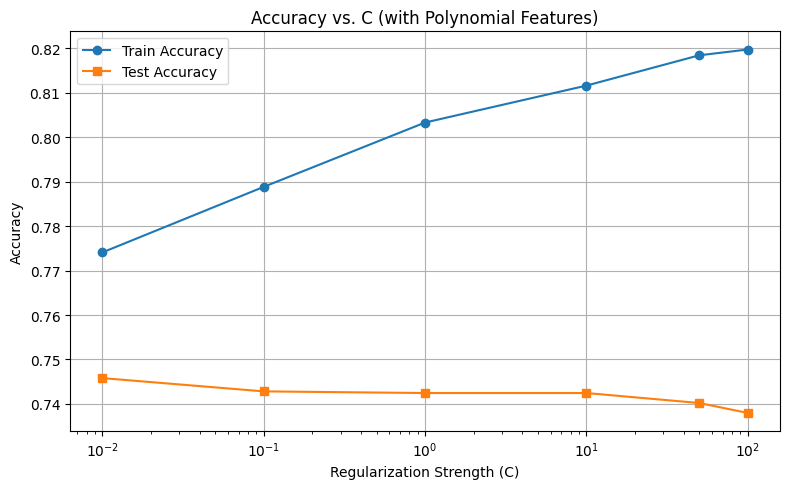

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(cs, train_scores, marker='o', label='Train Accuracy')
plt.plot(cs, test_scores, marker='s', label='Test Accuracy')

plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C (with Polynomial Features)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

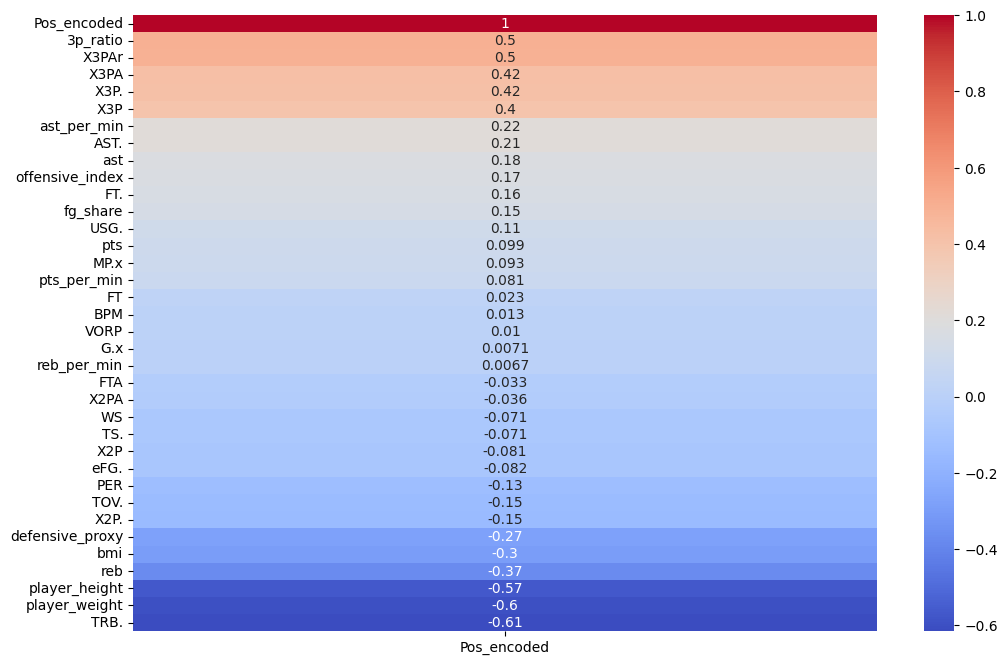

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 포지션을 수치형으로 LabelEncoding 먼저
from sklearn.preprocessing import LabelEncoder
df_corr = X_train_scaled.copy()
df_corr['Pos_encoded'] = LabelEncoder().fit_transform(y_train)

corr = df_corr.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr[['Pos_encoded']].sort_values(by='Pos_encoded', ascending=False), annot=True, cmap='coolwarm')

In [ ]:
drop_low_corr = ['G.x', 'MP.x', 'FTA', 'PER', 'VORP', 'BPM', 'bmi', 'eFG.', 'TS.', 'pts', 'FT.', 'pts_per_min']
X_filtered_train = X_train_scaled.drop(columns=drop_low_corr)
X_filtered_test = X_test_scaled.drop(columns=drop_low_corr)

In [ ]:
model.fit(X_filtered_train, y_train)

print(model.score(X_filtered_train, y_train))
print(model.score(X_filtered_test, y_test))

0.75
0.7394550205300485


In [ ]:
selected_features = [
    'player_height', 'player_weight', 'TRB.', 'X3PA', 'X3P.', 'X3PAr',
    'ast_per_min', 'AST.', 'offensive_index'
]

X_selected_train = X_train_scaled[selected_features]
X_selected_test = X_test_scaled[selected_features]

In [ ]:
model.fit(X_selected_train, y_train)

print(model.score(X_selected_train, y_train))
print(model.score(X_selected_test, y_test))

0.731235997012696
0.7278835386338186


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
print(model_knn.score(X_train_scaled, y_train))
print(model_knn.score(X_test_scaled, y_test))

0.7896751306945482
0.6618141097424413


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 모델 생성 및 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 예측
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# 정확도 출력
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred))

Train Accuracy: 1.0
Test Accuracy : 0.7607316162747294


<Figure size 800x600 with 0 Axes>

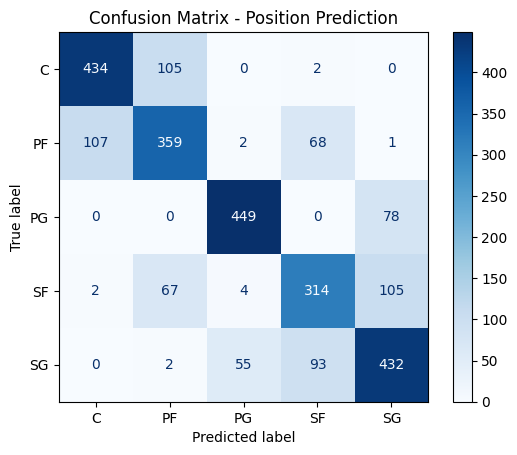

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 예측
y_pred = model.predict(X_test_scaled)

# 혼동 행렬
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# 시각화
plt.figure(figsize=(8,6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Position Prediction")
plt.show()

In [ ]:
def simplify_pos(pos):
    if pos in ['PG', 'SG']:
        return 'G'
    elif pos in ['SF']:
        return 'F'
    else:
        return 'B'  # Big: PF, C

y_train_simple = y_train.apply(simplify_pos)
y_test_simple = y_test.apply(simplify_pos)

In [ ]:
model.fit(X_train_scaled, y_train_simple)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
print(model.score(X_train_scaled, y_train_simple))
print(model.score(X_test_scaled, y_test_simple))

0.8703323375653472
0.8701007838745801


In [ ]:
model_lg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
model_lg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
print(model_lg.score(X_train_scaled, y_train))
print(model_lg.score(X_test_scaled, y_test))

0.7529873039581777
0.7420679357969392
